In [2]:
import os 
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import *

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data=pd.read_csv('dataset.csv',encoding = "ISO-8859-1")

In [4]:
data.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [5]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,'',input_text)
    
  return input_text

In [6]:
df=pd.DataFrame(columns=['tidy'])

In [7]:
df['tidy']=np.vectorize(remove_pattern)(data['SentimentText'],",[\w]*")
df['tidy']=df['tidy'].str.replace('[^a-zA-z]'," ")

In [8]:
df['tidy']=df['tidy'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [9]:
df.head()

,tidy
0,first think another Disney movie might good ki...
1,aside House repeat missed Desperate Housewives...
2,Stephen King work film made even greater King ...
3,watched horrid thing Needless movies watch muc...
4,truly enjoyed film acting terrific plot Jeff C...


In [10]:
tokenized_review=df['tidy'].apply(lambda x:x.split())
tokenized_review.head()

0    [first, think, another, Disney, movie, might, ...
1    [aside, House, repeat, missed, Desperate, Hous...
2    [Stephen, King, work, film, made, even, greate...
3    [watched, horrid, thing, Needless, movies, wat...
4    [truly, enjoyed, film, acting, terrific, plot,...
Name: tidy, dtype: object

In [11]:
stemmer=PorterStemmer()

In [12]:
tokenized_review=tokenized_review.apply(lambda x: [stemmer.stem(i) for i in x])

In [13]:
tokenized_review.head()

0    [first, think, anoth, disney, movi, might, goo...
1    [asid, hous, repeat, miss, desper, housew, wat...
2    [stephen, king, work, film, made, even, greate...
3    [watch, horrid, thing, needless, movi, watch, ...
4    [truli, enjoy, film, act, terrif, plot, jeff, ...
Name: tidy, dtype: object

In [14]:
for i in range(len(tokenized_review)):
    tokenized_review[i]=' '.join(tokenized_review[i])

df['tidy']=tokenized_review

In [15]:
df.head()

,tidy
0,first think anoth disney movi might good kid m...
1,asid hous repeat miss desper housew watch know...
2,stephen king work film made even greater king ...
3,watch horrid thing needless movi watch much wo...
4,truli enjoy film act terrif plot jeff comb tal...


In [16]:
all_words=' '.join([word for word in df['tidy']])

In [17]:
all_words_list=all_words.split(' ')

In [18]:
all_word_frame=pd.DataFrame(all_words_list)

In [ ]:
X=all_word_frame[0].value_counts()

In [42]:
X

movi             51690
film             48181
like             22778
time             16188
good             15353
make             15205
charact          14178
watch            13942
stori            13165
even             12897
would            12434
realli           11731
well             11024
scene            10595
look             10042
show              9875
much              9760
peopl             9389
great             9164
also              9153
first             9060
love              9013
think             8910
play              8723
made              8360
thing             8211
could             7922
act               7546
know              7507
that              7297
                 ...  
ishoo                1
howlin               1
bringleson           1
mcculler             1
kiara                1
parliamentari        1
portastat            1
hippiest             1
hoven                1
cedrick              1
unexpress            1
inbound              1
goodand    

In [21]:
from wordcloud import WordCloud 

In [22]:
wordcld=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

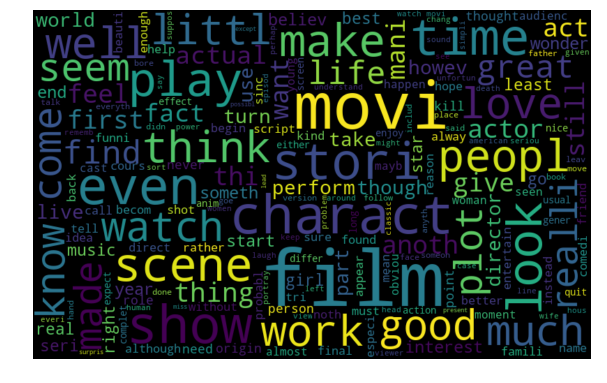

In [23]:
plt.figure(figsize=(10,7))
plt.imshow(wordcld,interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
data['tidy']=df['tidy']

In [25]:
data.head()

,SentimentText,Sentiment,tidy
0,"first think another Disney movie, might good, ...",1,first think anoth disney movi might good kid m...
1,"Put aside Dr. House repeat missed, Desperate H...",0,asid hous repeat miss desper housew watch know...
2,"big fan Stephen King's work, film made even gr...",1,stephen king work film made even greater king ...
3,watched horrid thing TV. Needless say one movi...,0,watch horrid thing needless movi watch much wo...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truli enjoy film act terrif plot jeff comb tal...


In [26]:
normal_words=' '.join([text for text in data['tidy'][data['Sentiment']==1]])

In [27]:
normal_words_list=normal_words.split(' ')

In [28]:
normal_words_frame=pd.DataFrame(normal_words_list)

In [29]:
normal_words_frame[0].value_counts()

film           25293
movi           22652
like           10445
time            8494
good            7834
stori           7472
charact         7074
make            6966
well            6695
watch           6552
great           6482
love            6156
show            5589
also            5547
realli          5473
would           5400
even            5113
play            5094
scene           4993
first           4757
much            4686
peopl           4544
best            4322
think           4293
life            4207
look            4173
year            4053
work            3966
made            3821
mani            3774
               ...  
wurli              1
bensen             1
sexdrug            1
whiplash           1
leland             1
huggi              1
mutia              1
shiu               1
smetim             1
maximillian        1
splint             1
monstersand        1
geritan            1
taiwan             1
girlpow            1
sabbath            1
tuttl        

In [30]:
wordcld_normal=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

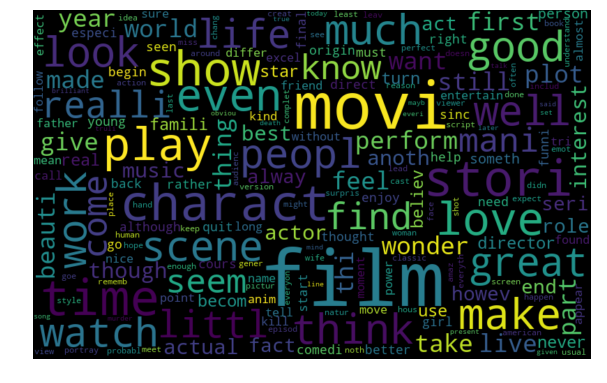

In [31]:
plt.figure(figsize=(10,7))
plt.imshow(wordcld_normal,interpolation='bilinear')
plt.axis('off')
plt.show()

In [104]:
negative_words=' '.join([text for text in data['tidy'][data['Sentiment']==0]])

In [179]:
df2 = pd.DataFrame(np.array(negative_words.split(' ')).reshape(-1, 1), columns=['words'])

In [180]:
unique_words = list(df2['words'].str.split(' ', expand=True).stack().unique())

In [181]:
word_counts = list(df2['words'].value_counts())

In [194]:
df4 = pd.DataFrame(np.hstack((np.array(unique_words).reshape(-1,1),np.array(word_counts).reshape(-1,1))), columns=['words','word_count'])

In [208]:
df4_new=df4[df4['word_count'].map(len)==1]

In [209]:
df4_new

,words,word_count
9002,flinch,9
9003,ourselv,9
9004,decim,9
9005,slide,9
9006,gwyenth,9
9007,howit,9
9008,trivia,9
9009,mitch,9
9010,zenia,9
9011,secretari,9


In [210]:
df4_words_new=df4_new['words']

In [223]:
df4_words_new=np.array(df4_words_new)
df4_words_new.shape

(26101,)

In [220]:
df4_words_list=list(df4_words_new)

In [224]:
df4_words_list

['flinch',
 'ourselv',
 'decim',
 'slide',
 'gwyenth',
 'howit',
 'trivia',
 'mitch',
 'zenia',
 'secretari',
 'chari',
 'augusta',
 'dodger',
 'endear',
 'profus',
 'abet',
 'captiv',
 'grabbi',
 'pig',
 'humili',
 'genitalia',
 'broom',
 'unoffici',
 'blasphem',
 'naughti',
 'tennesse',
 'upbring',
 'pointi',
 'bra',
 'girdl',
 'shade',
 'gretchen',
 'valedictorian',
 'truss',
 'undergar',
 'lillian',
 'gish',
 'progeni',
 'strasberg',
 'exclus',
 'psychiatr',
 'howler',
 'draperi',
 'mciver',
 'widmark',
 'marbl',
 'graham',
 'staffer',
 'vincent',
 'minelli',
 'wart',
 'kerr',
 'siodmak',
 'criss',
 'lifestyl',
 'anachron',
 'rout',
 'ugliest',
 'dullest',
 'flattest',
 'revoltingli',
 'gallagh',
 'applianc',
 'fichtner',
 'crisper',
 'videotap',
 'intensifi',
 'airway',
 'satan',
 'conceal',
 'reservoir',
 'britney',
 'gill',
 'prestigi',
 'pedal',
 'silk',
 'purs',
 'galaxina',
 'unicorn',
 'foulata',
 'gagoola',
 'introduct',
 'unforgiv',
 'kukuanaland',
 'kingdom',
 'nooo',
 't

In [36]:
wordcld_negative=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

(-0.5, 799.5, 499.5, -0.5)

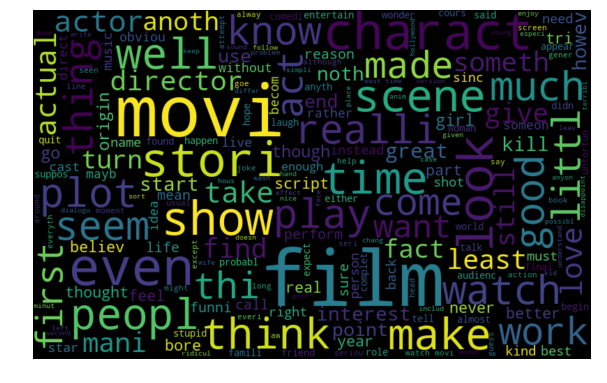

In [37]:
plt.figure(figsize=(10,7))
plt.imshow(wordcld_negative,interpolation='bilinear')
plt.axis('off')


In [46]:
data['cleaned_tidy']=np.vectorize(remove_pattern)(data['tidy'],'movi')
data['cleaned_tidy']=np.vectorize(remove_pattern)(data['cleaned_tidy'],'film')

In [218]:
def remove_pattern_new(input_txt, pattern):
    for i in pattern:
        
        r = re.findall(i, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
    
    return input_txt

In [221]:
data['cleaned_tidy']=np.vectorize(remove_pattern_new)(data['tidy'],df4_words_list)

ValueError: operands could not be broadcast together with shapes (25000,) (26101,) 